In [1]:
#import_librariesa
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_colwidth", None)
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

# Modify in CSV File

In [2]:
Customer_Purchase_History_data = pd.read_csv('customer_purchase_history.csv')
Customer_Purchase_History_data.head()

,S_num,Product,Feedback,Item_id,Size,User_id,Category,Size_convention,Sub_category,Us_size,Purchase_date,age,height,weight
0,0.0,romper,fit,2260466.0,14.0,420272.0,Women's Topwear,Num,Dresses,14,5-Sep-19,28.0,"5' 8""",137lbs
1,1.0,gown,fit,153475.0,12.0,273551.0,Women's Topwear,Num,Dresses,12,12-Dec-19,36.0,"5' 6""",132lbs
2,2.0,sheath,fit,1063761.0,4.0,360448.0,Women's Topwear,Num,Dresses,4,7-May-19,116.0,"5' 4""",NaN
3,3.0,dress,fit,126335.0,8.0,909926.0,Women's Topwear,Num,Dresses,8,19-Jul-19,34.0,"5' 5""",135lbs
4,4.0,gown,fit,616682.0,12.0,151944.0,Women's Topwear,Num,Dresses,12,31-Aug-19,27.0,"5' 9""",145lbs


In [3]:
Unique_customer_customer01 = Customer_Purchase_History_data[Customer_Purchase_History_data['User_id']== 691468]
Unique_customer_customer02 = Customer_Purchase_History_data[Customer_Purchase_History_data['User_id']== 32925]

In [140]:
Unique_Customer_df = Unique_customer_customer01.drop(['S_num', 'Item_id','User_id','Category','Size_convention','Sub_category','Us_size','Purchase_date'], axis =1)
Unique_Customer_df

,Product,Feedback,Size,age,height,weight
727,blazer,large,8.0,25.0,"5' 6""",145lbs
976,dress,large,4.0,28.0,"5' 6""",122lbs
1168,dress,fit,8.0,45.0,"5' 1""",162lbs
1335,dress,large,4.0,33.0,"5' 4""",155lbs
1684,dress,large,8.0,28.0,"5' 11""",161lbs
...,...,...,...,...,...,...
182084,dress,small,12.0,40.0,"5' 4""",190lbs
182317,dress,large,8.0,35.0,"5' 8""",150lbs
182856,dress,fit,8.0,50.0,"5' 2""",135lbs
183241,dress,fit,8.0,32.0,"5' 4""",145lbs


In [139]:
#Unique_customer2 = Unique_customer_customer02.drop(['S_num', 'Item_id','User_id','Category','Size_convention','Sub_category','Us_size','Purchase_date'], axis =1)
#Unique_customer2

In [138]:
#Unique_Customer_df = pd.concat([Unique_customer1, Unique_customer2])

In [141]:
Unique_Customer_df.isnull().sum()

Product      0
Feedback     0
Size         0
age          0
height       2
weight      50
dtype: int64

In [142]:
Unique_Customer_df.weight.fillna(100,inplace=True)
Unique_Customer_df.age.fillna(50,inplace=True)
Unique_Customer_df.height.fillna(0,inplace=True)

In [143]:
Unique_Customer_df.isnull().sum()

Product     0
Feedback    0
Size        0
age         0
height      0
weight      0
dtype: int64

In [11]:
Unique_Customer_df.dtypes

Product      object
Feedback     object
Size        float64
age         float64
height       object
weight       object
dtype: object

In [145]:
dict_feedback={'fit':0, 'small' :1, 'large':2}
Unique_Customer_df['Feedback'] = Unique_Customer_df['Feedback'].map(dict_feedback)

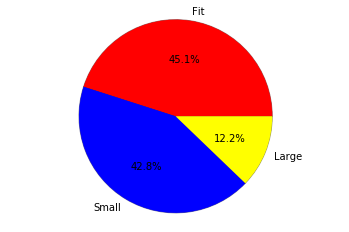

In [146]:
labels = 'Fit', 'Small' , 'Large'
sizes = Unique_Customer_df['Feedback'].value_counts()  #Imbalanced_Dataset
colors = ['red', 'blue', 'yellow']
patches = plt.pie(sizes, labels= labels, autopct='%1.1f%%', radius=1400,colors = colors, shadow = True)
plt.axis('equal')
plt.show()

In [147]:
Unique_Customer_df.dtypes

Product      object
Feedback      int64
Size        float64
age         float64
height       object
weight       object
dtype: object

In [148]:
Unique_Customer_df['age'].astype(int)
Unique_Customer_df['Size'].astype(int)

727        8
976        4
1168       8
1335       4
1684       8
          ..
182084    12
182317     8
182856     8
183241     8
183496    12
Name: Size, Length: 435, dtype: int32

In [149]:
Unique_Customer_df['height'] = Unique_Customer_df['height'].str.replace(" ",'')
Unique_Customer_df['height'] = Unique_Customer_df['height'].str.replace("\"",'')
Unique_Customer_df['height'] = Unique_Customer_df['height'].str.replace("'", ".")

In [150]:
def convert_height(height):
    
        height = str(height).split(".")
        feet = str(height[0])
        try :
            inches = str(height[1])
        except :
            inches = 0
        return (12*int(feet)) +int(inches)

In [151]:
Unique_Customer_df['height'].unique() #= Unique_Customer_df['height'].apply(lambda x:convert_height(x))

array(['5.6', '5.1', '5.4', '5.11', '5.5', '5.7', '5.3', '5.9', '5.2',
       '5.0', '5.8', '5.10', nan, '6.1', '6.0', '6.2'], dtype=object)

In [152]:
Unique_Customer_df.height.fillna(0,inplace=True)

In [153]:
Unique_Customer_df['height']= Unique_Customer_df['height'].apply(lambda x:convert_height(x))

In [154]:
Unique_Customer_df['weight'] = Unique_Customer_df['weight'].str.replace('lbs', ' ')

In [155]:
Unique_Customer_df['weight'].unique()

array(['145 ', '122 ', '162 ', '155 ', '161 ', '180 ', '152 ', '130 ',
       '140 ', '115 ', '117 ', '135 ', nan, '160 ', '147 ', '134 ',
       '128 ', '120 ', '170 ', '109 ', '165 ', '150 ', '110 ', '138 ',
       '127 ', '125 ', '246 ', '175 ', '148 ', '112 ', '118 ', '200 ',
       '153 ', '215 ', '220 ', '126 ', '116 ', '154 ', '132 ', '168 ',
       '142 ', '141 ', '105 ', '240 ', '143 ', '113 ', '166 ', '108 ',
       '100 ', '197 ', '123 ', '163 ', '131 ', '210 ', '225 ', '129 ',
       '195 ', '133 ', '185 ', '158 ', '124 ', '139 ', '190 '],
      dtype=object)

In [156]:
Unique_Customer_df.weight.fillna(0,inplace=True)

In [157]:
Unique_Customer_df['weight'].unique()

array(['145 ', '122 ', '162 ', '155 ', '161 ', '180 ', '152 ', '130 ',
       '140 ', '115 ', '117 ', '135 ', 0, '160 ', '147 ', '134 ', '128 ',
       '120 ', '170 ', '109 ', '165 ', '150 ', '110 ', '138 ', '127 ',
       '125 ', '246 ', '175 ', '148 ', '112 ', '118 ', '200 ', '153 ',
       '215 ', '220 ', '126 ', '116 ', '154 ', '132 ', '168 ', '142 ',
       '141 ', '105 ', '240 ', '143 ', '113 ', '166 ', '108 ', '100 ',
       '197 ', '123 ', '163 ', '131 ', '210 ', '225 ', '129 ', '195 ',
       '133 ', '185 ', '158 ', '124 ', '139 ', '190 '], dtype=object)

In [158]:
Unique_Customer_df['weight'] = Unique_Customer_df['weight'].astype(int)

In [159]:
Unique_Customer_df['Size'] = Unique_Customer_df['Size'].astype(int)

In [160]:
Unique_Customer_df['age'] = Unique_Customer_df['age'].astype(int)

In [161]:
Unique_Customer_df.dtypes  #New_One

Product     object
Feedback     int64
Size         int32
age          int32
height       int64
weight       int32
dtype: object

In [162]:
Unique_Customer_df = pd.get_dummies(Unique_Customer_df, columns=['Product'])

In [163]:
Unique_Customer_df.head()

,Feedback,Size,age,height,weight,Product_blazer,Product_blouse,Product_blouson,Product_cape,Product_dress,...,Product_jumpsuit,Product_maxi,Product_midi,Product_romper,Product_sheath,Product_shift,Product_shirt,Product_shirtdress,Product_top,Product_tunic
727,2,8,25,66,145,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976,2,4,28,66,122,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1168,0,8,45,61,162,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1335,2,4,33,64,155,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1684,2,8,28,71,161,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [164]:
bins = [15,24,45,60,Unique_Customer_df.age.max()]
labels = ['Young Adult', 'Adult','Older Adult','Senior']
Unique_Customer_df["age"] = pd.cut(Unique_Customer_df["age"], bins, labels = labels)

In [165]:
dict_age ={'Young Adult':0, 'Adult':1, 'Older Adult':2, 'Senior':3}
Unique_Customer_df['age'] = Unique_Customer_df['age'].map(dict_age)

In [166]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['Size', 'age', 'height', 'weight']
Unique_Customer_df[columns_to_scale] = standScaler.fit_transform(Unique_Customer_df[columns_to_scale])

In [167]:
Unique_Customer_df

,Feedback,Size,age,height,weight,Product_blazer,Product_blouse,Product_blouson,Product_cape,Product_dress,...,Product_jumpsuit,Product_maxi,Product_midi,Product_romper,Product_sheath,Product_shift,Product_shirt,Product_shirtdress,Product_top,Product_tunic
727,2,0.155648,-0.097189,0.181342,0.459951,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976,2,-1.127892,-0.097189,0.181342,-0.009765,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1168,0,0.155648,-0.097189,-0.790131,0.807132,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1335,2,-1.127892,-0.097189,-0.207248,0.664175,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1684,2,0.155648,-0.097189,1.152814,0.786709,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182084,1,1.439187,-0.097189,-0.207248,1.378960,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
182317,2,0.155648,-0.097189,0.569931,0.562063,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
182856,0,0.155648,2.389703,-0.595837,0.255726,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
183241,0,0.155648,-0.097189,-0.207248,0.459951,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [168]:
X1 = Unique_Customer_df.drop(['Feedback'], axis =1)
y1 = Unique_Customer_df['Feedback']

In [169]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.4)

# Logistic Regression for MultiClass Classification

In [205]:
from sklearn.linear_model import LogisticRegression   #is not a perfect fit #691468
logreg = LogisticRegression(multi_class='ovr')  #ovo "ValueError: multi_class should be 'multinomial', 'ovr' or 'auto'. Got ovo"

#fit data
logreg.fit(X1_train,y1_train)

#Predicting_over_train
y_pred = logreg.predict(X1_train)
#print("Predicting over train set",y_pred)

#Predicting over test
test_pred = logreg.predict(X1_test)
#print('predicting over test set',test_pred)

count_misclassified = (y1_test != test_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

from sklearn import metrics
accuracy = metrics.accuracy_score(y1_test , test_pred)
print('Accuracy: {:.2f}'.format(accuracy))

print('Training dataset {} and testing dataset {}'.format(X1_train.shape,X1_test.shape))

Misclassified samples: 50
Accuracy: 0.71
Training dataset (261, 21) and testing dataset (174, 21)


In [206]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression   #is not a perfect fit #691468
logreg = LogisticRegression()

#Implementing OVR
ovr = OneVsRestClassifier(logreg)

#fit data
ovr.fit(X1_train,y1_train)

#Predicting_over_train
y_pred = ovr.predict(X1_train)
#print("Predicting over train set",y_pred)

#Predicting over test
test_pred = ovr.predict(X1_test)
#print('predicting over test set',test_pred)

count_misclassified = (y1_test != test_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

from sklearn import metrics
accuracy = metrics.accuracy_score(y1_test , test_pred)
print('Accuracy: {:.2f}'.format(accuracy))

print('Training dataset {} and testing dataset {}'.format(X1_train.shape,X1_test.shape))

Misclassified samples: 50
Accuracy: 0.71
Training dataset (261, 21) and testing dataset (174, 21)


# LogisticRegression

In [170]:
from sklearn.linear_model import LogisticRegression   #is not a perfect fit #691468
logreg = LogisticRegression()

#fit data
logreg.fit(X1_train,y1_train)

#Predicting_over_train
y_pred = logreg.predict(X1_train)
#print("Predicting over train set",y_pred)

#Predicting over test
test_pred = logreg.predict(X1_test)
#print('predicting over test set',test_pred)

count_misclassified = (y1_test != test_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

from sklearn import metrics
accuracy = metrics.accuracy_score(y1_test , test_pred)
print('Accuracy: {:.2f}'.format(accuracy))

print('Training dataset {} and testing dataset {}'.format(X1_train.shape,X1_test.shape))

Misclassified samples: 52
Accuracy: 0.70
Training dataset (261, 21) and testing dataset (174, 21)


In [171]:
#predicted Values
test_pred

array([0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0,
       2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [172]:
X1_test

,Size,age,height,weight,Product_blazer,Product_blouse,Product_blouson,Product_cape,Product_dress,Product_gown,...,Product_jumpsuit,Product_maxi,Product_midi,Product_romper,Product_sheath,Product_shift,Product_shirt,Product_shirtdress,Product_top,Product_tunic
18634,1.439187,2.389703,-0.012953,-0.050610,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28831,2.080956,-0.097189,0.375636,-0.152722,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
153387,1.439187,2.389703,-0.207248,-2.501301,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
47731,1.439187,-0.097189,-0.012953,0.255726,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
72086,-1.127892,-0.097189,0.569931,-2.501301,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177290,0.155648,-0.097189,0.569931,0.868399,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
65716,0.155648,-0.097189,0.181342,0.153614,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
126228,0.155648,-0.097189,0.764225,0.562063,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
121450,0.155648,-0.097189,0.181342,0.255726,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
y1_test

18634     0
28831     1
153387    1
47731     0
72086     2
         ..
177290    0
65716     0
126228    0
121450    2
29894     0
Name: Feedback, Length: 174, dtype: int64

In [174]:
train_score = logreg.score(X1_train, y1_train)  #Poor Model
test_score = logreg.score(X1_test, y1_test)
print('The train_score is {} and the test_score is{}'.format(train_score, test_score))

The train_score is 0.7739463601532567 and the test_score is0.7011494252873564


# DecisionTreeClassifier

In [175]:
# Importing essential libraries
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

#fit the data
DTC.fit(X1_train,y1_train)

#Predicting_over_train
y_pred = DTC.predict(X1_train)
#print("Predicting over train set",y_pred)

#Predicting over test
test_pred = DTC.predict(X1_test)
#print('predicting over test set',test_pred)

count_misclassified = (y1_test != test_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

from sklearn import metrics
accuracy = metrics.accuracy_score(y1_test , test_pred)
print('Accuracy: {:.2f}'.format(accuracy))

print('Training dataset {} and testing dataset {}'.format(X1_train.shape,X1_test.shape))

Misclassified samples: 68
Accuracy: 0.61
Training dataset (261, 21) and testing dataset (174, 21)


In [176]:
train_score = DTC.score(X1_train, y1_train)  #Overfitting Model(Bias Model)
test_score = DTC.score(X1_test, y1_test)
print('The train_score is {} and the test_score is{}'.format(train_score, test_score))

The train_score is 0.9655172413793104 and the test_score is0.6091954022988506


# Random Forest

In [177]:
# Importing essential libraries
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(criterion='gini')

#fit the data
RFC.fit(X1_train,y1_train)

#Predicting_over_train
y_pred = RFC.predict(X1_train)
#print("Predicting over train set",y_pred)

#Predicting over test
test_pred = RFC.predict(X1_test)
#print('predicting over test set',test_pred)

count_misclassified = (y1_test != test_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

from sklearn import metrics
accuracy = metrics.accuracy_score(y1_test , test_pred)
print('Accuracy: {:.2f}'.format(accuracy))

print('Training dataset {} and testing dataset {}'.format(X1_train.shape,X1_test.shape))

Misclassified samples: 58
Accuracy: 0.67
Training dataset (261, 21) and testing dataset (174, 21)


In [178]:
# Importing essential libraries
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(criterion='entropy')

#fit the data
RFC.fit(X1_train,y1_train)

#Predicting_over_train
y_pred = RFC.predict(X1_train)
#print("Predicting over train set",y_pred)

#Predicting over test
test_pred = RFC.predict(X1_test)
#print('predicting over test set',test_pred)

count_misclassified = (y1_test != test_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

from sklearn import metrics
accuracy = metrics.accuracy_score(y1_test , test_pred)
print('Accuracy: {:.2f}'.format(accuracy))

print('Training dataset {} and testing dataset {}'.format(X1_train.shape,X1_test.shape))

Misclassified samples: 51
Accuracy: 0.71
Training dataset (261, 21) and testing dataset (174, 21)


In [179]:
train_score = RFC.score(X1_train, y1_train)  #Overfitting Model(Bias Model)
test_score = RFC.score(X1_test, y1_test)
print('The train_score is {} and the test_score is{}'.format(train_score, test_score))

The train_score is 0.9655172413793104 and the test_score is0.7068965517241379


# Support Vector Machine  for Multiclass classification

In [210]:
# Importing essential libraries
from sklearn.svm import SVC
svc = SVC(decision_function_shape='ovo')  #onevsone

#fit the data
svc.fit(X1_train,y1_train)

#Predicting_over_train
y_pred = svc.predict(X1_train)
#print("Predicting over train set",y_pred)

#Predicting over test
test_pred = svc.predict(X1_test)
#print('predicting over test set',test_pred)

count_misclassified = (y1_test != test_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

from sklearn import metrics
accuracy = metrics.accuracy_score(y1_test , test_pred)
print('Accuracy: {:.2f}'.format(accuracy))

print('Training dataset {} and testing dataset {}'.format(X1_train.shape,X1_test.shape))


Misclassified samples: 52
Accuracy: 0.70
Training dataset (261, 21) and testing dataset (174, 21)


In [211]:
# Importing essential libraries
from sklearn.svm import SVC
svc = SVC(decision_function_shape='ovr')  #onevsrest

#fit the data
svc.fit(X1_train,y1_train)

#Predicting_over_train
y_pred = svc.predict(X1_train)
#print("Predicting over train set",y_pred)

#Predicting over test
test_pred = svc.predict(X1_test)
#print('predicting over test set',test_pred)

count_misclassified = (y1_test != test_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

from sklearn import metrics
accuracy = metrics.accuracy_score(y1_test , test_pred)
print('Accuracy: {:.2f}'.format(accuracy))

print('Training dataset {} and testing dataset {}'.format(X1_train.shape,X1_test.shape))


Misclassified samples: 52
Accuracy: 0.70
Training dataset (261, 21) and testing dataset (174, 21)


In [208]:
# Importing essential libraries
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
svc = SVC()  #onevsrest

# define ovo strategy
ovo = OneVsOneClassifier(svc)

#fit the data
ovo.fit(X1_train,y1_train)

#Predicting_over_train
y_pred = ovo.predict(X1_train)
#print("Predicting over train set",y_pred)

#Predicting over test
test_pred = ovo.predict(X1_test)
#print('predicting over test set',test_pred)

count_misclassified = (y1_test != test_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

from sklearn import metrics
accuracy = metrics.accuracy_score(y1_test , test_pred)
print('Accuracy: {:.2f}'.format(accuracy))

print('Training dataset {} and testing dataset {}'.format(X1_train.shape,X1_test.shape))


Misclassified samples: 52
Accuracy: 0.70
Training dataset (261, 21) and testing dataset (174, 21)


# Support Vector Machine 

In [180]:
# Importing essential libraries
from sklearn.svm import SVC
svc = SVC()

#fit the data
svc.fit(X1_train,y1_train)

#Predicting_over_train
y_pred = svc.predict(X1_train)
#print("Predicting over train set",y_pred)

#Predicting over test
test_pred = svc.predict(X1_test)
#print('predicting over test set',test_pred)

count_misclassified = (y1_test != test_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

from sklearn import metrics
accuracy = metrics.accuracy_score(y1_test , test_pred)
print('Accuracy: {:.2f}'.format(accuracy))

print('Training dataset {} and testing dataset {}'.format(X1_train.shape,X1_test.shape))


Misclassified samples: 52
Accuracy: 0.70
Training dataset (261, 21) and testing dataset (174, 21)


In [66]:
#Random Forest, Decision Trees, Naive Bayes, SVM, Latent Drichlet Allocation, Boosting, Bagging, Maximum Entropy
#PCA  #https://reneshbedre.github.io/blog/pca_3d.html

In [181]:
X = Unique_Customer_df.drop(['Feedback', 'weight'], axis =1)
y = Unique_Customer_df['Feedback']

In [182]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.25, random_state =81)

In [183]:
from sklearn.linear_model import LogisticRegression   #is not a perfect fit #691468
logreg = LogisticRegression()

#fit data
logreg.fit(train_x,train_y)

#Predicting_over_train
y_pred = logreg.predict(train_x)
#print("Predicting over train set",y_pred)

#Predicting over test
test_pred = logreg.predict(test_x)
#print('predicting over test set',test_pred)

count_misclassified = (test_y != test_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

from sklearn import metrics
accuracy = metrics.accuracy_score(test_y , test_pred)
print('Accuracy: {:.2f}'.format(accuracy))

print('Training dataset {} and testing dataset {}'.format(train_x.shape,test_x.shape))

Misclassified samples: 36
Accuracy: 0.67
Training dataset (326, 20) and testing dataset (109, 20)


In [184]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [185]:
x_pca = pca.transform(X)

In [186]:
X.shape

(435, 20)

In [187]:
x_pca.shape

(435, 2)

In [188]:
pca.components_

array([[-6.26080351e-01, -6.47016374e-01, -4.31817415e-01,
        -1.63422436e-04, -2.32767135e-03,  3.52785617e-04,
        -1.63797947e-03, -4.55000932e-02, -6.20793967e-03,
         2.17294888e-03,  6.47443534e-03,  1.68839636e-02,
         3.52785617e-04,  1.16134485e-02, -7.04540142e-03,
         1.27510242e-02, -3.35491787e-04,  1.11756397e-02,
        -8.44785489e-04,  2.28575338e-03],
       [ 4.09248482e-01,  1.96499611e-01, -8.90240443e-01,
        -3.10240334e-04, -1.52864178e-03,  9.16721279e-04,
         1.11184433e-04,  1.96825244e-02,  2.83737570e-03,
         8.36615938e-05,  9.56426114e-04,  1.98719579e-02,
         9.16721279e-04, -9.72038864e-03,  3.06698368e-03,
        -1.22527162e-02, -7.19227539e-04, -1.73087621e-02,
        -1.85182094e-03, -4.75175887e-03]])

In [189]:
df_comp = pd.DataFrame(pca.components_, columns= X.columns)

In [190]:
df_comp.head()

,Size,age,height,Product_blazer,Product_blouse,Product_blouson,Product_cape,Product_dress,Product_gown,Product_jacket,Product_jumpsuit,Product_maxi,Product_midi,Product_romper,Product_sheath,Product_shift,Product_shirt,Product_shirtdress,Product_top,Product_tunic
0,-0.626080,-0.647016,-0.431817,-0.000163,-0.002328,0.000353,-0.001638,-0.045500,-0.006208,0.002173,0.006474,0.016884,0.000353,0.011613,-0.007045,0.012751,-0.000335,0.011176,-0.000845,0.002286
1,0.409248,0.196500,-0.890240,-0.000310,-0.001529,0.000917,0.000111,0.019683,0.002837,0.000084,0.000956,0.019872,0.000917,-0.009720,0.003067,-0.012253,-0.000719,-0.017309,-0.001852,-0.004752
